In [14]:
from pathlib import Path
import matplotlib as mpl
from flow_analysis_comps.data_structs.kymographs import kymoExtractConfig, GSTConfig

import matplotlib.pyplot as plt
import colorcet  # noqa: F401
from flow_analysis_comps.processing.kymographing.kymographer import KymographExtractor
from flow_analysis_comps.visualizing.kymographs import kymoVisualizer
from flow_analysis_comps.visualizing.GSTSpeeds import GSTSpeedVizualizer
from flow_analysis_comps.processing.GSTSpeedExtract.extract_velocity import kymoAnalyser
from flow_analysis_comps.data_structs.kymographs import graphExtractConfig
from flow_analysis_comps.processing.graph_extraction.graph_extract import VideoGraphExtractor
from flow_analysis_comps.visualizing.GraphVisualize import GraphVisualizer

plt.close("all")

%matplotlib widget

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
video_root_folder = Path(
    # r"/Users/simonvanstaalduine/AMOLF-SHIMIZU Dropbox/Simon van Staalduine/034"
    r"G:\AMOLF_Data\AMOLF-SHIMIZU Dropbox\Simon van Staalduine\035"
)
info_file_address = Path(video_root_folder / "videoInfo.txt")
graph_data = VideoGraphExtractor(video_root_folder, graphExtractConfig()).edge_data
kymograph_list = KymographExtractor(graph_data, kymoExtractConfig()).processed_kymographs
speed_obj = kymoAnalyser(kymograph_list[0], GSTConfig()).output_speeds()

[2025-05-26 22:31:33] INFO flow_analysis_comps.kymographer: Extracted edge coordinates from G:\AMOLF_Data\AMOLF-SHIMIZU Dropbox\Simon van Staalduine\034


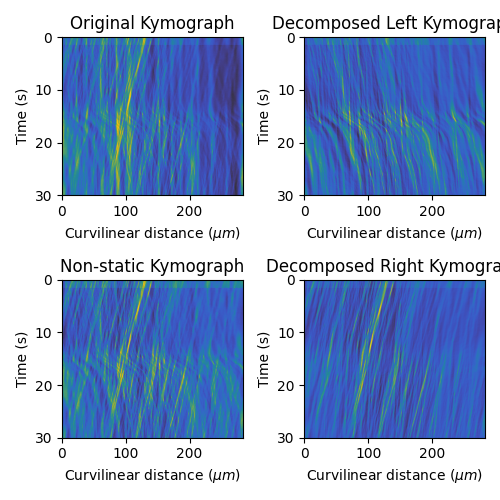

9.999194 -9.991112


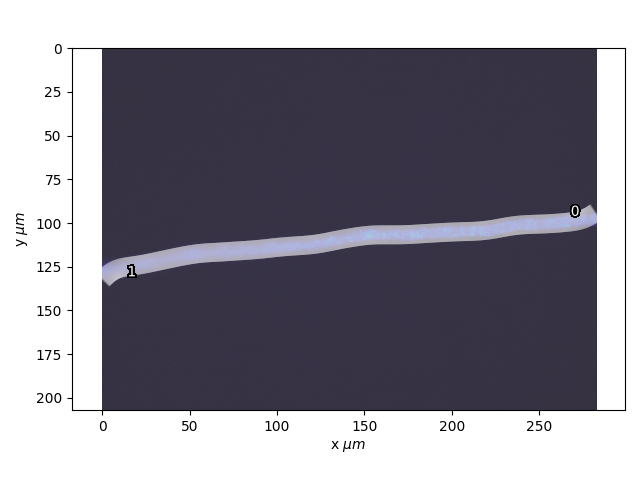

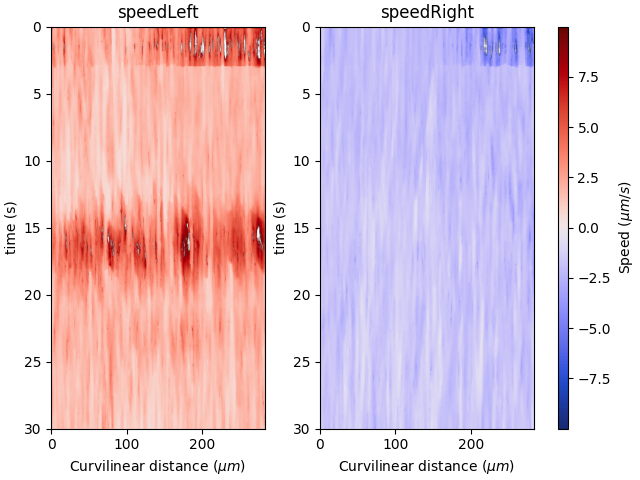

In [ ]:
GraphVisualizer(graph_data).plot_extraction()
kymoVisualizer(kymograph_list[0]).plot()
GSTSpeedVizualizer(speed_obj).show_speed_fields()

In [ ]:
from flow_analysis_comps.data_structs.kymographs import kymoDeltas
from flow_analysis_comps.processing.GSTSpeedExtract.extract_velocity import kymoAnalyser
import numpy as np

# video_deltas = videoDeltas(
#     delta_t=1,
#     delta_x=1
# )

# OSFilter = orientationSpaceManager(
#     0.15,
#     freq_width=0.2,
#     K=16,
#     x_spacing=video_deltas.delta_x,
#     y_spacing=video_deltas.delta_t,
# )

new_order = 8
speed_limit = 10

for kymo in kymographs:
    analyser = kymoAnalyser(
        kymo, speed_threshold=speed_limit
    )
    analyser.plot_kymo_fields()
    fig, ax = analyser.plot_summary()
    fig.savefig(video_root_folder / f"{kymo.name}_summary.png")


In [ ]:
fig, ax = plt.subplots()
histo_l_n = histo_l / np.max(histo_l)
histo_r_n = histo_r / np.max(histo_r)
ax.imshow(
    (histo_l_n + histo_r_n).T,
    cmap="cet_CET_L16",
    extent=(0, len(histo_l) * video_deltas.delta_t, -speed_limit, speed_limit),
    aspect="auto",
)